In [ ]:
#Importing the data
import pandas as pd
df = pd.read_csv( "Maintenance.csv" )
df

,Age,Utilization,MTBF,Unplanned_Downtime,Oil_Contamination,Overhauling_Schedule_Compliance,Schedule_Lubrication_Compliance,Machine_Failure
0,14,89.8,8.7,2.38,7,95.6,95.8,1
1,15,90.9,24.2,1.71,5,99.1,90.5,0
2,5,94.6,8.2,1.23,6,77.8,91.0,1
3,3,92.1,8.4,2.57,10,96.0,81.9,1
4,13,81.6,24.4,4.30,9,91.6,83.8,0
...,...,...,...,...,...,...,...,...
995,12,75.2,19.5,0.57,12,97.0,99.9,1
996,14,85.8,25.0,3.73,10,96.8,81.1,0
997,10,89.6,8.3,4.85,9,96.5,78.0,1
998,6,75.7,19.7,2.14,7,87.3,84.8,1


In [ ]:
list(df.columns)

['Age',
 'Utilization',
 'MTBF',
 'Unplanned_Downtime',
 'Oil_Contamination',
 'Overhauling_Schedule_Compliance',
 'Schedule_Lubrication_Compliance',
 'Machine_Failure']

In [ ]:
# Defining features variables
X_features = list( df.columns )
X_features.remove('Machine_Failure')
X_df = df[X_features]
list(X_df.columns)

['Age',
 'Utilization',
 'MTBF',
 'Unplanned_Downtime',
 'Oil_Contamination',
 'Overhauling_Schedule_Compliance',
 'Schedule_Lubrication_Compliance']

In [ ]:
# Defining features variables and dependent variable
Y = df.Machine_Failure
X = X_df

In [ ]:
# Splitting into Training and Validation Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [ ]:
X_train

,Age,Utilization,MTBF,Unplanned_Downtime,Oil_Contamination,Overhauling_Schedule_Compliance,Schedule_Lubrication_Compliance
541,2,76.7,8.6,1.91,5,76.0,82.2
440,6,90.9,13.0,4.69,10,81.2,92.7
482,5,75.8,13.9,2.47,12,88.9,94.8
422,2,95.8,14.3,4.49,13,84.1,97.5
778,15,90.3,12.8,1.15,14,84.2,96.4
...,...,...,...,...,...,...,...
106,16,88.2,18.3,2.15,12,91.0,85.9
270,7,82.1,23.2,2.15,13,97.1,84.9
860,13,87.9,16.1,1.20,6,98.5,97.5
435,13,93.1,8.5,4.23,5,80.8,84.1


In [ ]:
X_test

,Age,Utilization,MTBF,Unplanned_Downtime,Oil_Contamination,Overhauling_Schedule_Compliance,Schedule_Lubrication_Compliance
521,10,88.3,12.4,0.77,5,76.0,82.1
737,6,80.6,20.8,1.10,5,84.5,82.0
740,11,88.2,24.3,1.76,4,95.7,80.6
660,2,81.0,19.5,5.71,8,84.9,96.9
411,7,91.3,12.0,4.55,10,77.2,88.4
...,...,...,...,...,...,...,...
468,13,89.9,25.1,1.10,8,94.4,88.7
935,16,87.4,17.2,2.89,5,85.7,85.6
428,3,80.6,14.3,3.49,5,90.2,94.2
7,10,95.1,18.5,2.52,10,87.4,97.8


In [ ]:
# Building Decision Tree classifier using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini',max_depth=2)
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=2)

In [ ]:
#Print the Decision Tree
from matplotlib import pyplot as plt
from sklearn import tree

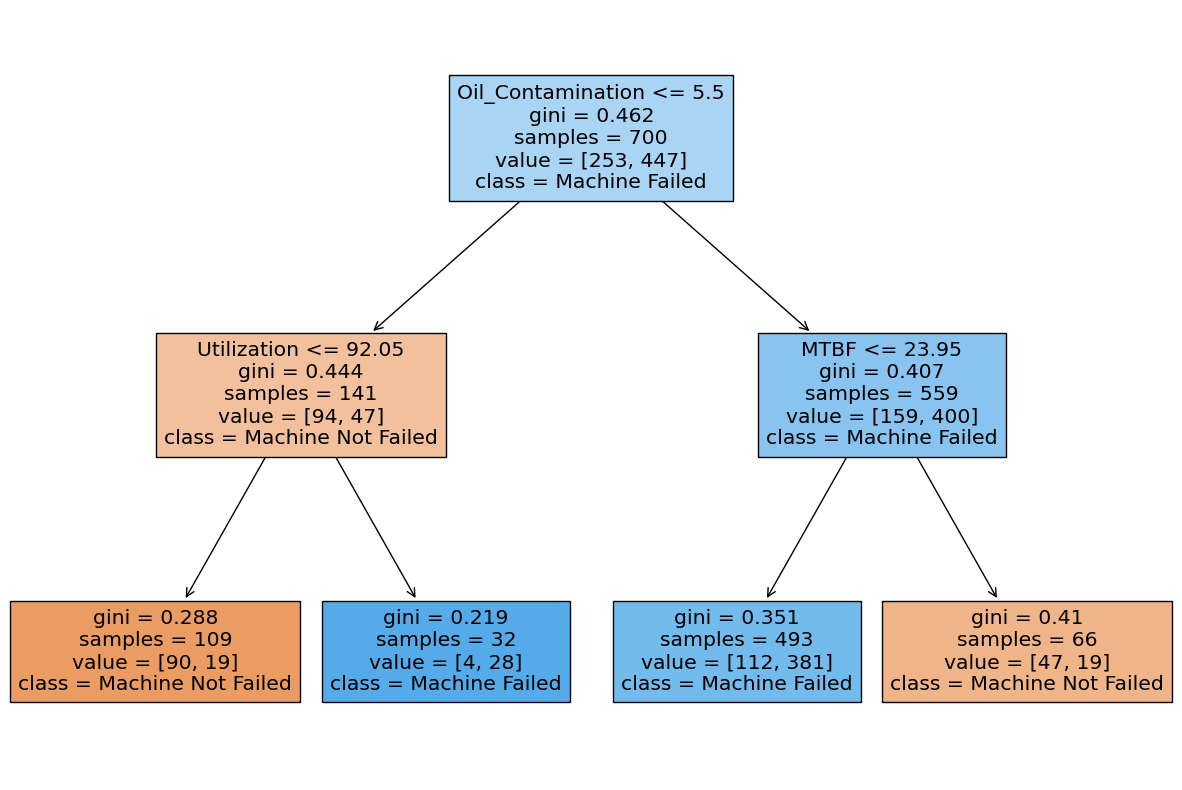

In [ ]:
#Print the Decision Tree (continued)
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf_tree, feature_names=X_train.columns, class_names=['Machine Not Failed', 'Machine Failed'],filled=True)

In [ ]:
# Predicting on Test Data
from sklearn import metrics
y_pred = clf_tree.predict(X_test)
y_pred_df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
y_pred_df

,Actual,Predicted
521,0,0
737,0,0
740,0,0
660,1,1
411,1,1
...,...,...
468,0,0
935,1,0
428,0,0
7,1,1


In [ ]:
#Confusion Matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
print( confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 57  65]
 [ 16 162]]
0.73
